In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
mm_df = pd.read_csv("MinMaxScaling.csv", low_memory=False)
st_df = pd.read_csv("StandardScaling.csv", low_memory=False)
no_df = pd.read_csv("NormalizerScaling.csv", low_memory=False)

In [14]:
def plot_heatmap(matrix, title, labels, cmap='YlGnBu'):
    plt.figure(figsize=(5, 5))
    sns.heatmap(matrix, annot=True, cmap=cmap, fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    return None

def plot_confusion_matrix(y_actuals, y_preds, labels=[0,1]):
    # confusion matrix
    cmat = confusion_matrix(y_true=y_actuals, y_pred=y_preds)
    # precision matrix
    pmat = cmat / cmat.sum(axis=0)
    # recall matrix
    rmat = cmat / cmat.sum(axis=1)
    # class labels

    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)

    return None

In [18]:
def random_forest_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test, show_plot=True):

    sig_clf = RandomForestClassifier(max_depth=8, n_estimators=100)
    sig_clf.fit(X_train, y_train)

    y_train_preds = sig_clf.predict_proba(X_train)
    train_log_loss = log_loss(y_train, y_train_preds)
    print("Training Log Loss:", train_log_loss)

    y_valid_preds = sig_clf.predict_proba(X_valid)
    valid_log_loss = log_loss(y_valid, y_valid_preds)
    print("Validation Log Loss:", valid_log_loss)

    y_test_preds = sig_clf.predict_proba(X_test)
    test_log_loss = log_loss(y_test, y_test_preds)
    print("Testing Log Loss:", test_log_loss)

    if show_plot:
        predict_y = sig_clf.predict(X_test)
        plot_confusion_matrix(y_actuals=y_test, y_preds=predict_y)

    classification_report = metrics.classification_report(y_test, predict_y)
    print(classification_report)

    return train_log_loss, valid_log_loss, test_log_loss, sig_clf

In [27]:
def data_splitting(df):
    X = df.drop("Label", axis=1)  # Features
    y = df["Label"]
    X, X_test, y, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=15)
    X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, train_size = 0.5/0.7, random_state = 15)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [28]:
def comparing(df):
    X_train, X_val, X_test, y_train, y_val, y_test = data_splitting(df)
    return random_forest_classifier(X_train, y_train, X_val, y_val, X_test, y_test)

Training Log Loss: 0.003845483373883381
Validation Log Loss: 0.004359007765884819
Testing Log Loss: 0.004348615769098259


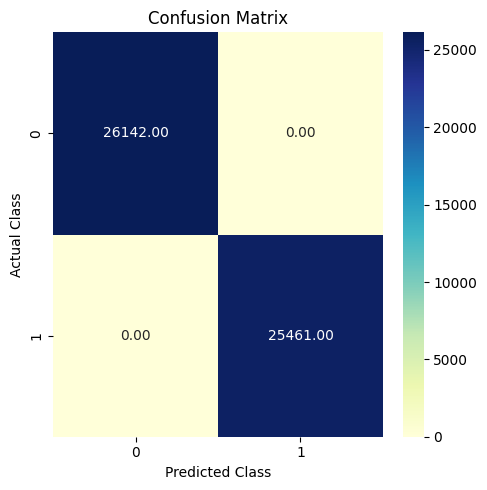

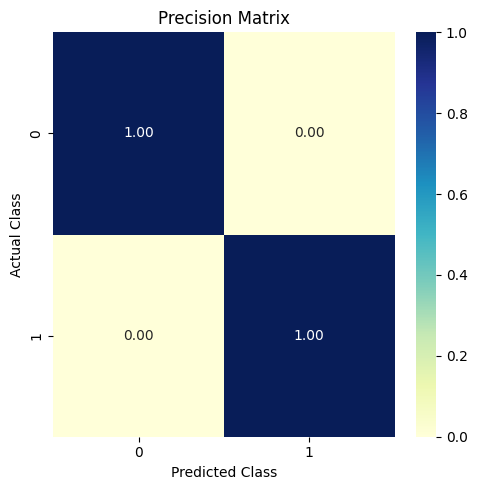

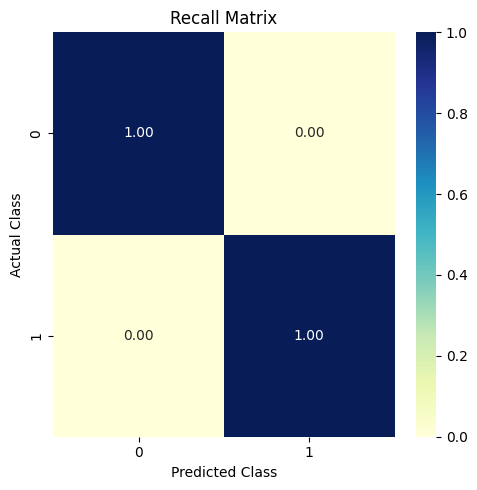

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26142
           1       1.00      1.00      1.00     25461

    accuracy                           1.00     51603
   macro avg       1.00      1.00      1.00     51603
weighted avg       1.00      1.00      1.00     51603



In [29]:
mm_df_train_loss, mm_df_valid_loss, mm_df_test_loss, mm_df_model = comparing(mm_df)

Training Log Loss: 0.004470366636278065
Validation Log Loss: 0.004975362594146568
Testing Log Loss: 0.0049505498635330335


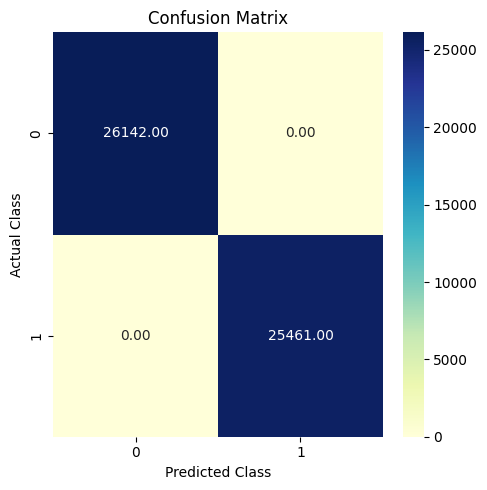

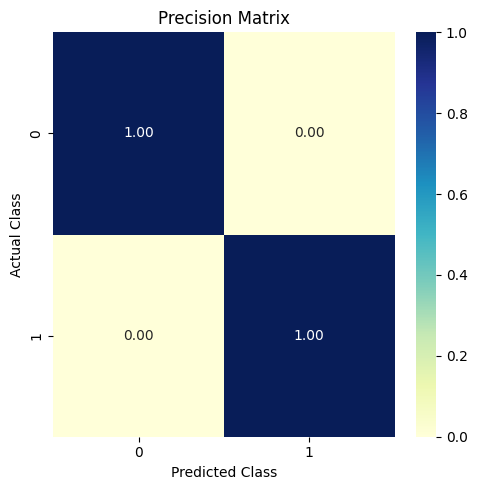

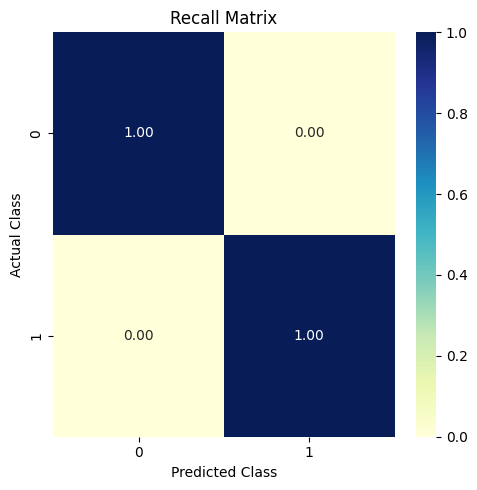

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26142
           1       1.00      1.00      1.00     25461

    accuracy                           1.00     51603
   macro avg       1.00      1.00      1.00     51603
weighted avg       1.00      1.00      1.00     51603



In [30]:
st_df_train_loss, st_df_valid_loss, st_df_test_loss, st_df_model = comparing(st_df)

Training Log Loss: 0.02102303326680835
Validation Log Loss: 0.022711154131582756
Testing Log Loss: 0.022467179816439947


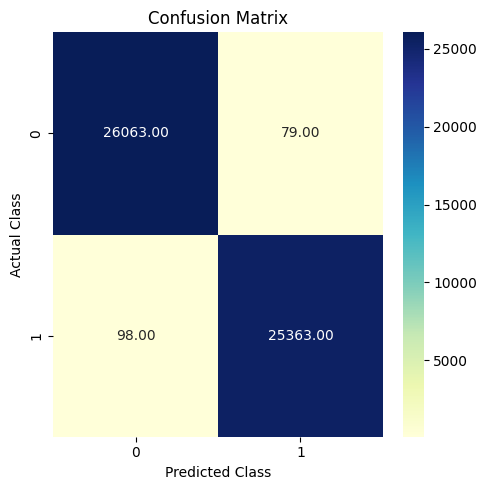

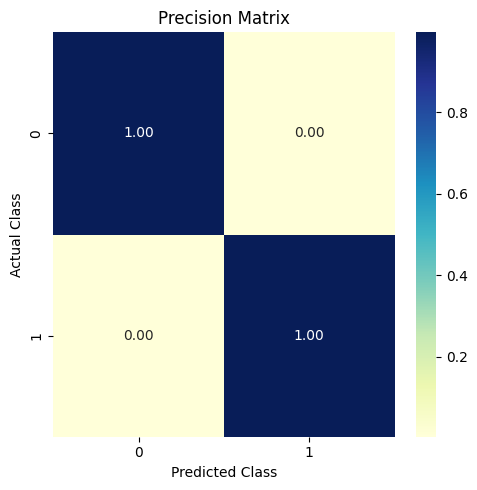

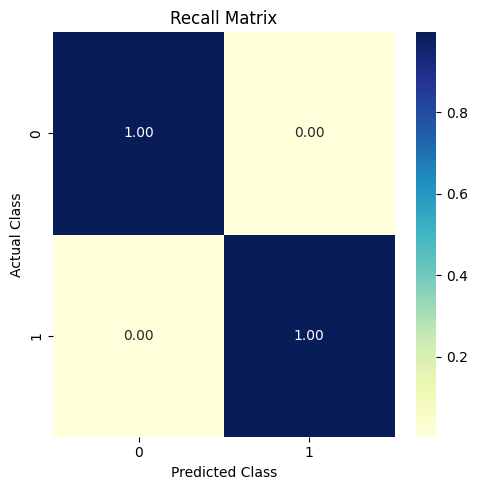

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26142
           1       1.00      1.00      1.00     25461

    accuracy                           1.00     51603
   macro avg       1.00      1.00      1.00     51603
weighted avg       1.00      1.00      1.00     51603



In [31]:
no_df_train_loss, no_df_valid_loss, no_df_test_loss, no_df_model = comparing(no_df)

In [33]:
def model_score(df, model):
    X_train, X_val, X_test, y_train, y_val, y_test = data_splitting(df)
    return model.score(X_test, y_test)

mm_s = model_score(mm_df, mm_df_model)
st_s = model_score(st_df, st_df_model)
no_s = model_score(no_df,no_df_model)

In [39]:
import time

# Record start time for prediction
def pred_time(df, model_name):
    X_train, X_val, X_test, y_train, y_val, y_test = data_splitting(df)
    start_pred = time.time()
    y_pred = model_name.predict(X_test)
    end_pred = time.time()
    return end_pred - start_pred

mm_pt = pred_time(mm_df, mm_df_model)
st_pt = pred_time(st_df, st_df_model)
no_pt = pred_time(no_df,no_df_model)

In [41]:
model_names = ['MinMaxScaling', 'StandardScaling', 'NormalizerScaling'] 
train_losses = [mm_df_train_loss, st_df_train_loss, no_df_train_loss]
valid_losses = [mm_df_valid_loss, st_df_valid_loss, no_df_valid_loss]
test_losses = [mm_df_test_loss, st_df_test_loss, no_df_test_loss]
test_accuracy = [mm_s, st_s, no_s]
total_time = [mm_pt, st_pt, no_pt]

summary_df = pd.DataFrame()
summary_df['Normalizers'] = model_names
summary_df['Train Loss'] = train_losses
summary_df['Valid Loss'] = valid_losses
summary_df['Test Loss'] = test_losses
summary_df['Test Accuracy (%)'] = test_accuracy
summary_df['Total Time (s)'] = total_time
(summary_df)

,Normalizers,Train Loss,Valid Loss,Test Loss,Test Accuracy (%),Total Time (s)
0,MinMaxScaling,0.003845,0.004359,0.004349,1.00000,0.301123
1,StandardScaling,0.004470,0.004975,0.004951,1.00000,0.272621
2,NormalizerScaling,0.021023,0.022711,0.022467,0.99657,0.314167
